# Time Series Forecasting of House Prices - Prophet

Using machine learning on MLS (Multiple Listing Services) data to accurately predict real estate figures of Santa Monica and Greater Los Angeles Area

## Tools
+ Python
+ Pandas
+ Numpy
+ Seaborn
+ Scikit-Learn
+ Matplotlib
+ fbprophet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from epiweeks import Week
from statsmodels.tools.eval_measures import rmse
# from src.housing_scripts import *
from src.time_scripts import *

pd.options.display.max_columns = None
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## READ CSV INTO DATAFRAME

In [3]:
master=pd.read_csv('data/clean_master.csv',header=0, index_col=0)

## IMPORT PROPHET

In [4]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from src.time_scripts import *

Separate into property type and city subsets

In [5]:
master, sfr_master, condo_master, town_master, sm_data, bh_data, sl_data = forecasting_datasets_setup(master) 

## Split into Weeks
+ split into weekly unit closed count
+ split into different cities

## Data is formatted for modeling

In [6]:
# data by city
sm_count_weekly_data=week_split_count(sm_data)
bh_count_weekly_data=week_split_count(bh_data)
sl_count_weekly_data=week_split_count(sl_data)

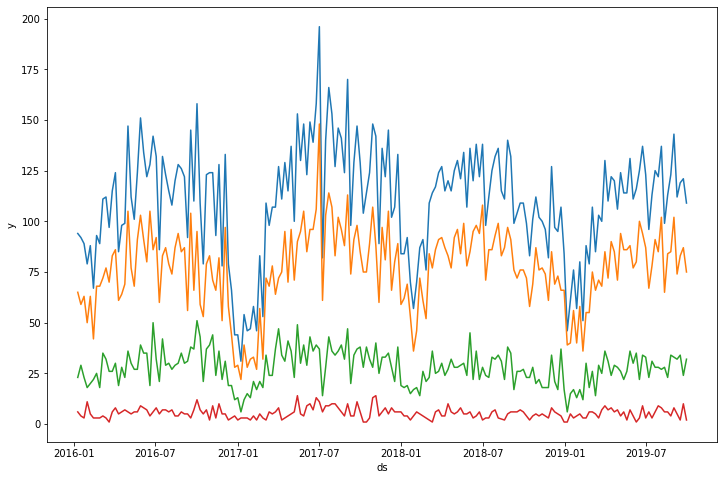

In [7]:
# data is compared at different time increments
master_day_data=day_split_count(master)
sfr_day_data=day_split_count(sfr_master)
condo_day_data=day_split_count(condo_master)

master_week_data=week_split_count(master)
sfr_week_data=week_split_count(sfr_master)
condo_week_data=week_split_count(condo_master)

master_month_data=time_series_sale_count(master)
sfr_month_data=time_series_sale_count(sfr_master)
condo_month_data=time_series_sale_count(condo_master)


fig,ax=plt.subplots(figsize=(12,8))
ax1=time_plot(week_split_count(master))
ax2=time_plot(week_split_count(sfr_master))
ax3=time_plot(week_split_count(condo_master))
ax4=time_plot(week_split_count(town_master))


# Implement Facebook Prophet

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


''

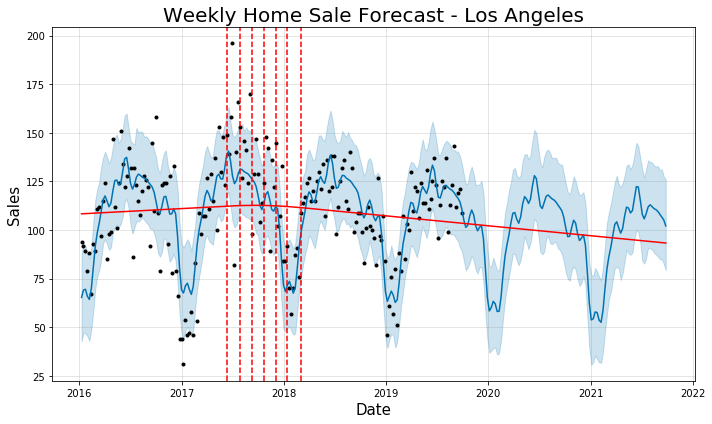

In [8]:
master_model=Prophet()
master_model.fit(master_week_data)
master_future = master_model.make_future_dataframe(periods=104,freq='W')
master_forecast = master_model.predict(master_future)
fig = master_model.plot(master_forecast)
a = add_changepoints_to_plot(fig.gca(),master_model,master_forecast)
plt.title('Weekly Home Sale Forecast - Los Angeles',size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Sales',size=15)
plt.savefig('pictures/house_sale_forecast.png')
plt.tight_layout()
;

## Out of the box forecasting model

''

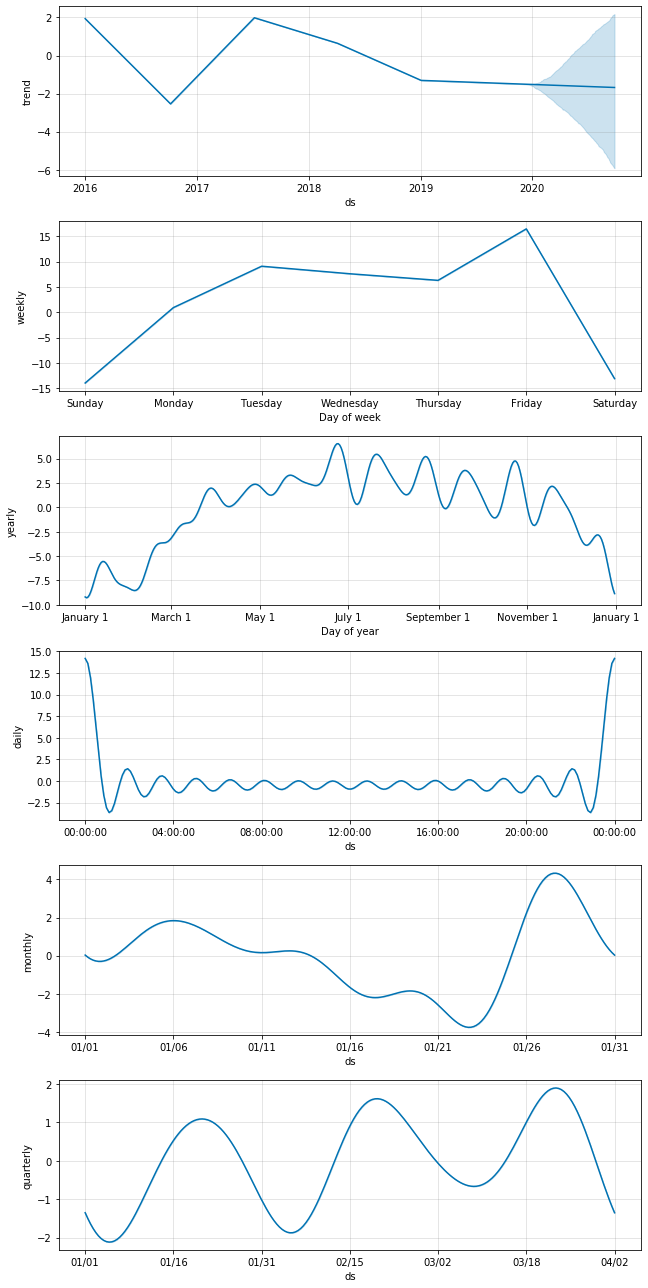

In [9]:
## These are the parameters that are tuned for better performance
master_model=Prophet(
    growth='linear',
    n_changepoints=4,
    changepoint_range=0.8,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive',
    seasonality_prior_scale=20,
    changepoint_prior_scale=.5,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    ).add_seasonality(
        name='monthly',
        period=30.5,
        fourier_order=5
    ).add_seasonality(
        name='daily',
        period=1,
        fourier_order=15
    ).add_seasonality(
        name='weekly',
        period=7,
        fourier_order=20
    ).add_seasonality(
        name='yearly',
        period=365.25,
        fourier_order=20
    ).add_seasonality(
        name='quarterly',
        period=365.25/4,
        fourier_order=5,
        prior_scale=15)
master_model.fit(master_day_data)
master_future = master_model.make_future_dataframe(periods=365)
master_forecast = master_model.predict(master_future)
master_model.plot_components(master_forecast)
plt.savefig('pictures/plot_components_daily.png')
;

Test the model by splitting it and comparing the prediction to data the model has not seen yet.

In [10]:
master_week_data.shape[0] # check size of dataframe

195

MAPE = 0.0896283317901109
RMSE = 11.931292025474733
MEAN = 110.07179487179488


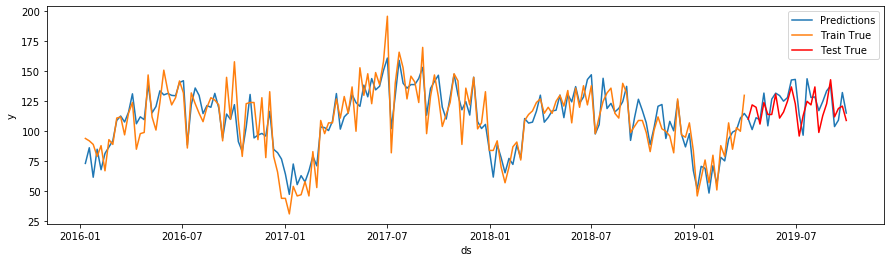

In [11]:
split=169 
freq='W'
train_test_split_weekly_analysis(master_week_data,split,freq)
plt.savefig('pictures/master_weekly_split.png')

## Analyze residence type

MAPE = 0.0896283317901109
RMSE = 11.931292025474733
MEAN = 110.07179487179488


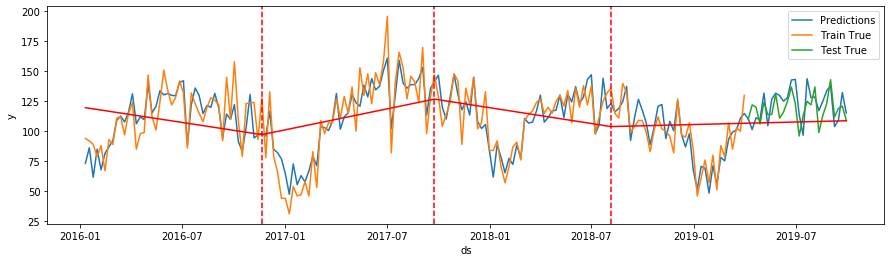

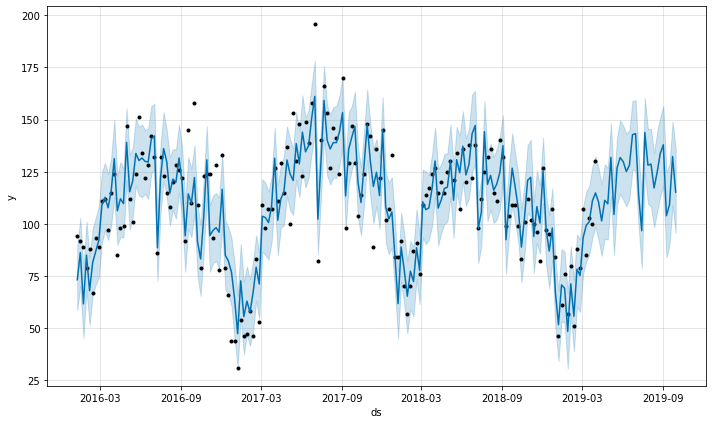

In [12]:
changepoints=3
split=169
freq='W'

prophet_analysis(master_week_data,split,freq,changepoints)

## Analyze residence type: SFR
+ fitting the model and looking at SFR property types specifically 

MAPE = 0.10044227462121245
RMSE = 10.025888001406152
MEAN = 76.75897435897436


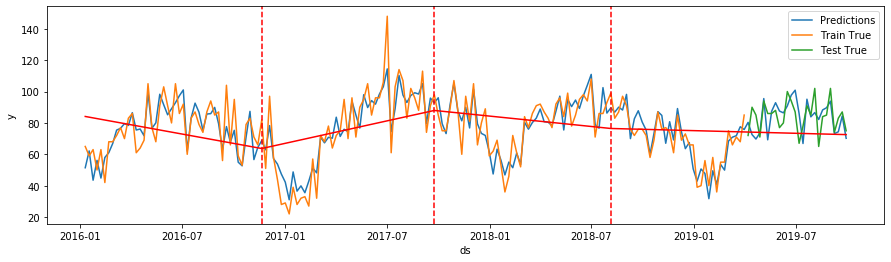

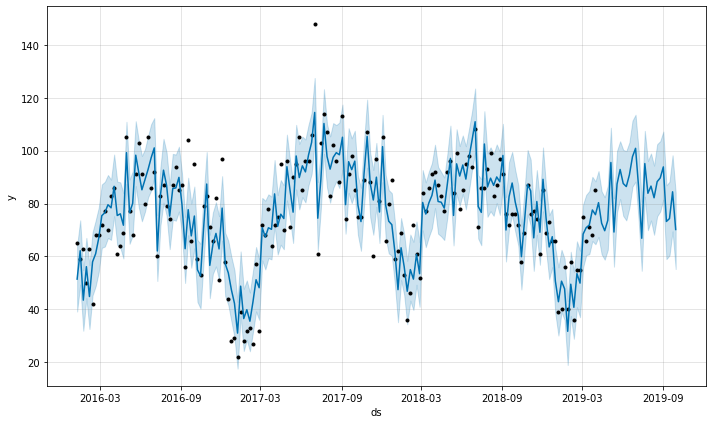

In [13]:
changepoints=48
split=169
freq='W'


prophet_analysis(sfr_week_data,split,freq,changepoints)
plt.savefig('pictures/sfr_weekly_split.png')

## Analyze residence type: Condo

MAPE = 0.15564130314234667
RMSE = 5.714365904915073
MEAN = 27.933333333333334


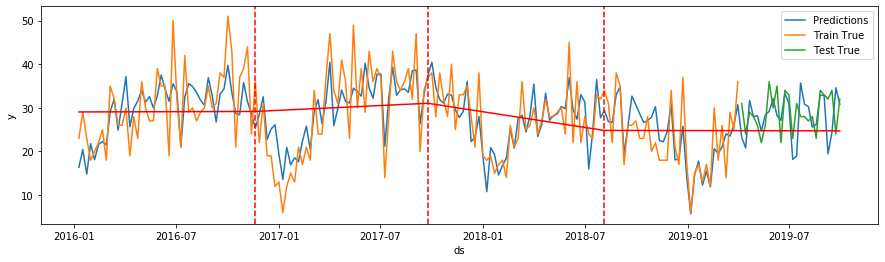

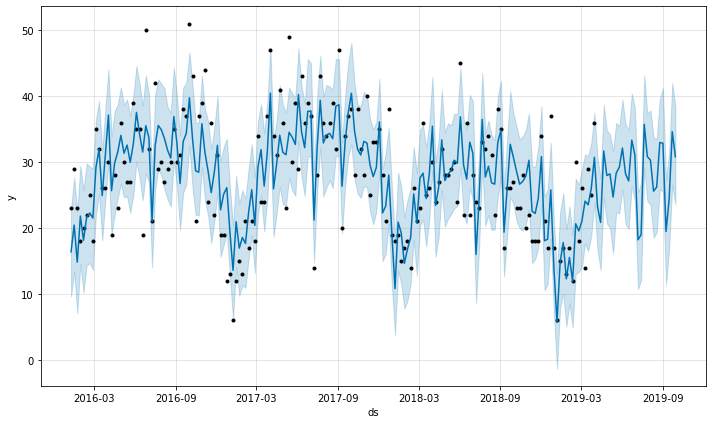

In [49]:
changepoints=48
split=169
freq='W'


prophet_analysis(condo_week_data,split,freq,changepoints)
plt.savefig('pictures/condo_weekly_split.png')

# Weekly average sale price (CITIES)

In [15]:
sm_week_split_avg_close_price = week_split_avg_close_price(sm_data)
bh_week_split_avg_close_price = week_split_avg_close_price(bh_data)
sl_week_split_avg_close_price = week_split_avg_close_price(sl_data)

## Examining and forecasting weekly avg sale price by city

## SilverLake AVG Sale Price Trend

MAPE = 0.196535211843441
RMSE = 314999.86447522265
MEAN = 1071838.4941154472


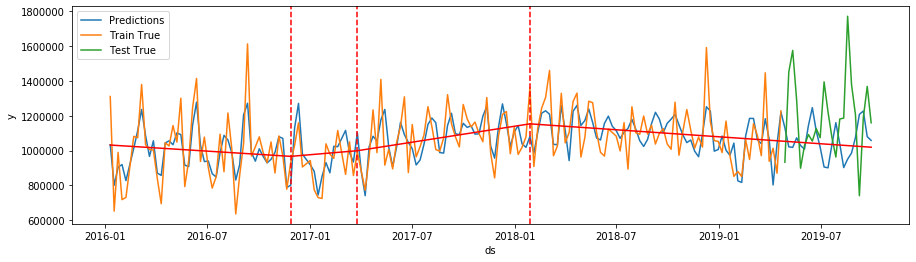

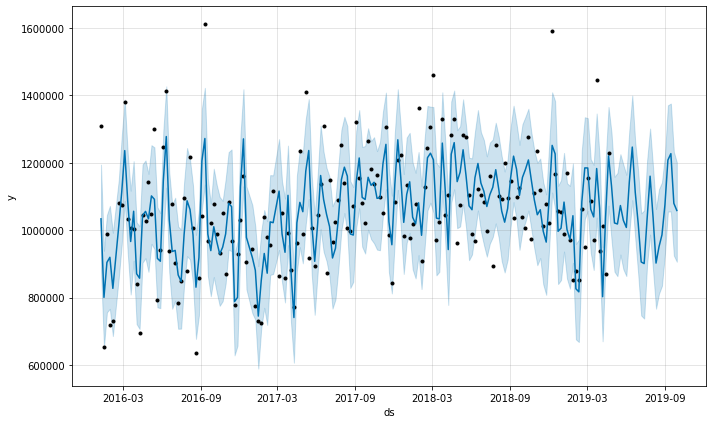

In [42]:
split=169
freq='W'
# plot_compare(sm_count_weekly_data,bh_count_weekly_data,sl_count_weekly_data,freq)
prophet_analysis_type(sl_week_split_avg_close_price,split,freq,9)

## Santa Monica AVG Sale Price Trend

MAPE = 0.296252012019722
RMSE = 972061.4766082779
MEAN = 2002966.2791285133


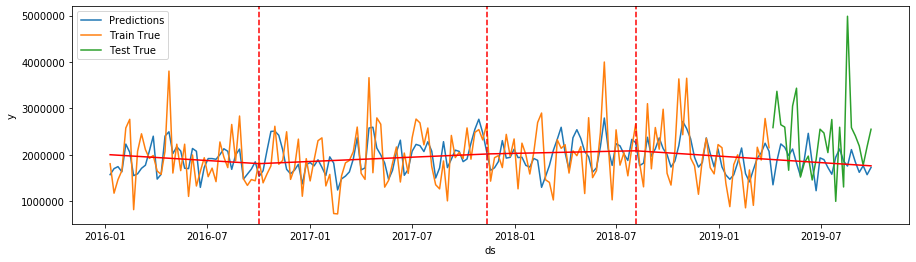

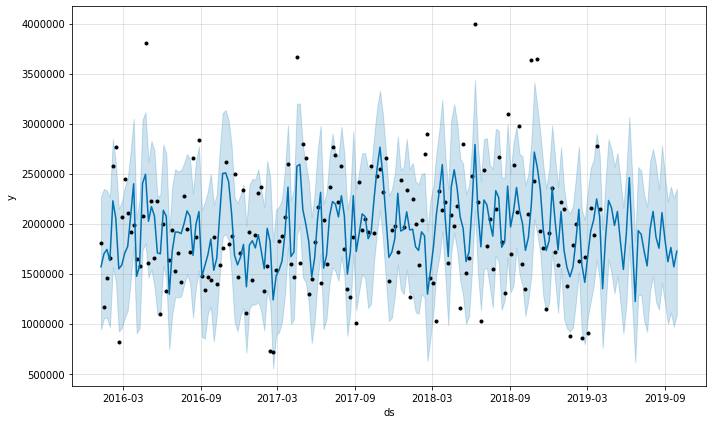

In [43]:
split=169
freq='W'
changepoints = 5
# plot_compare(sm_count_weekly_data,bh_count_weekly_data,sl_count_weekly_data,freq)
prophet_analysis_type(sm_week_split_avg_close_price,split,freq,7)

MAPE = 0.19869139112180356
RMSE = 318458.31981640216
MEAN = 1071838.4941154472


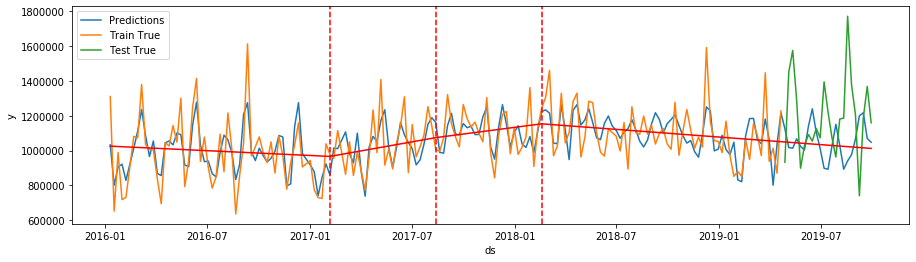

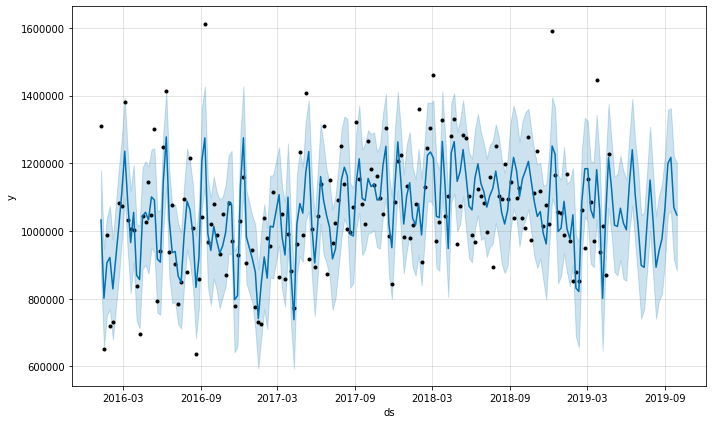

In [44]:
split=169
freq='W'
# plot_compare(sm_count_weekly_data,bh_count_weekly_data,sl_count_weekly_data,freq)
prophet_analysis_type(sl_week_split_avg_close_price,split,freq,changepoints)

## Beverly Hills AVG Sale Price Trend

MAPE = 0.46356048906619207
RMSE = 2024080.1475839203
MEAN = 4414722.421994123


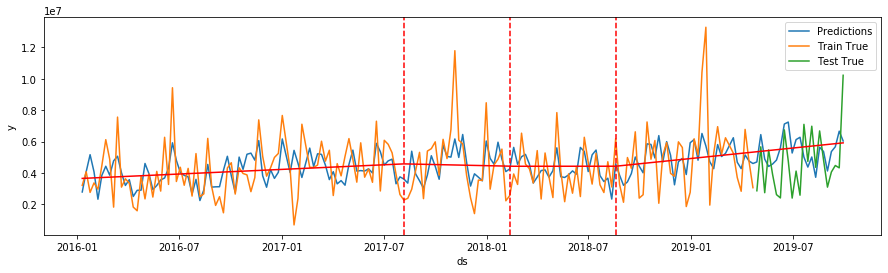

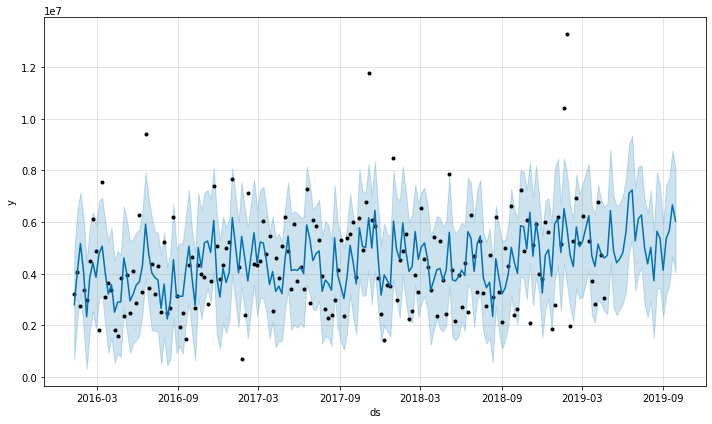

In [45]:
split=169
freq='W'
# plot_compare(sm_count_weekly_data,bh_count_weekly_data,sl_count_weekly_data,freq)
prophet_analysis_type(bh_week_split_avg_close_price,split,freq,changepoints)

## Compare behavior of each city's historical home price pattern

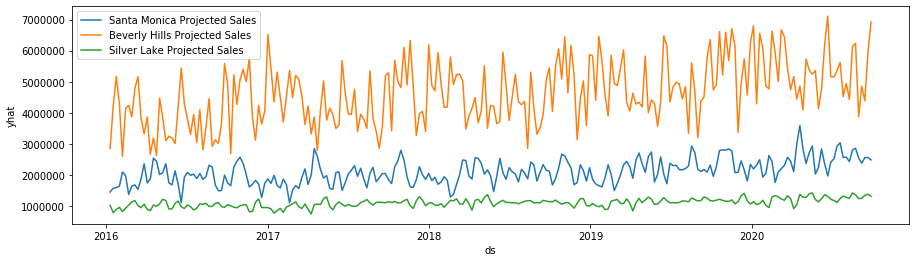

In [46]:
  
split=169
freq='W'
plot_compare(sm_week_split_avg_close_price,bh_week_split_avg_close_price,sl_week_split_avg_close_price,freq)

## CV

For calculating accuracy we use mean absolute percent error (MAPE). 

In [47]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [48]:

split=169
freq='W'

df_cv, perf = prophet_cv_analysis(master_week_data,freq,changepoints=3)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-04-02 00:00:00 and 2019-04-02 00:00:00


          ds        yhat  yhat_lower  yhat_upper    y     cutoff
0 2019-04-07  110.433812   93.351458  127.211760  110 2019-04-02
1 2019-04-14  101.385935   82.944863  118.152505  122 2019-04-02
2 2019-04-21  111.272362   95.321656  128.544952  120 2019-04-02
3 2019-04-28  109.626790   93.020034  125.327792  106 2019-04-02
4 2019-05-05  131.858723  118.213886  149.629429  124 2019-04-02
  horizon         mse       rmse        mae      mape  coverage
0 12 days  212.563939  14.579573  10.523939  0.086456       0.5
1 19 days  250.555679  15.828951  14.670852  0.120849       0.5
2 26 days   44.662639   6.683011   6.177214  0.053473       1.0
3 33 days   37.456565   6.120177   5.742756  0.048796       1.0
4 40 days   75.817244   8.707310   8.669482  0.073268       1.0


In [23]:
master_weekly_mape = perf.mape.mean()
print(master_weekly_mape)

0.09200090660292431


## MAPE is relative to size

In [24]:
split=169
freq='W'

df_cv, perf = prophet_cv_analysis(sl_week_split_avg_close_price,freq,changepoints=3)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-04-02 00:00:00 and 2019-04-02 00:00:00


          ds          yhat    yhat_lower    yhat_upper             y  \
0 2019-04-07  7.453496e+05  6.027715e+05  8.916814e+05  1.013571e+06   
1 2019-04-14  1.089422e+06  9.328243e+05  1.258412e+06  8.699167e+05   
2 2019-04-21  1.256318e+06  1.109563e+06  1.401142e+06  1.227879e+06   
3 2019-04-28  1.112513e+06  9.622335e+05  1.251774e+06  9.330012e+05   
4 2019-05-05  1.019646e+06  8.660058e+05  1.172540e+06  1.451111e+06   

      cutoff  
0 2019-04-02  
1 2019-04-02  
2 2019-04-02  
3 2019-04-02  
4 2019-04-02  
  horizon           mse           rmse            mae      mape  coverage
0 12 days  6.006274e+10  245077.005143  243863.512654  0.258480       0.0
1 19 days  2.449567e+10  156510.913622  123972.178196  0.137745       0.5
2 26 days  1.651667e+10  128517.177853  103975.543931  0.107782       0.5
3 33 days  1.091934e+11  330444.314195  305488.655726  0.244869       0.0
4 40 days  2.420484e+11  491984.130578  488649.521252  0.321926       0.0


In [25]:
master_weekly_mape = perf.mape.mean()
print(master_weekly_mape)

0.1949134189459742


## Santa Monica Cross Validation Set

In [26]:

split=169
freq='W'

df_cv, perf = prophet_cv_analysis(sm_week_split_avg_close_price,freq,changepoints=3)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-04-02 00:00:00 and 2019-04-02 00:00:00


          ds          yhat    yhat_lower    yhat_upper             y  \
0 2019-04-07  1.325273e+06  7.469162e+05  1.969940e+06  2.584250e+06   
1 2019-04-14  1.841351e+06  1.249773e+06  2.495924e+06  3.367500e+06   
2 2019-04-21  2.214117e+06  1.643127e+06  2.793193e+06  2.645625e+06   
3 2019-04-28  2.135506e+06  1.497595e+06  2.828880e+06  2.595200e+06   
4 2019-05-05  1.949191e+06  1.330442e+06  2.594030e+06  1.663777e+06   

      cutoff  
0 2019-04-02  
1 2019-04-02  
2 2019-04-02  
3 2019-04-02  
4 2019-04-02  
  horizon           mse          rmse           mae      mape  coverage
0 12 days  1.957077e+12  1.398956e+06  1.392563e+06  0.470186       0.0
1 19 days  1.257665e+12  1.121457e+06  9.788286e+05  0.308151       0.5
2 26 days  1.987590e+11  4.458239e+05  4.456011e+05  0.170117       1.0
3 33 days  1.463899e+11  3.826094e+05  3.725540e+05  0.174339       1.0
4 40 days  5.019708e+11  7.084990e+05  6.229361e+05  0.243225       0.5


## Santa Monica MAPE

In [27]:
master_weekly_mape = perf.mape.mean()
print(master_weekly_mape)

0.29760865979689927


## Beverly Hills CV

In [28]:

split=169
freq='W'

df_cv, perf = prophet_cv_analysis(bh_week_split_avg_close_price,freq,changepoints=3)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-04-02 00:00:00 and 2019-04-02 00:00:00


          ds          yhat    yhat_lower    yhat_upper             y  \
0 2019-04-07  4.479402e+06  2.126456e+06  6.520001e+06  6.775286e+06   
1 2019-04-14  4.876078e+06  2.985756e+06  7.114169e+06  4.738625e+06   
2 2019-04-21  5.509642e+06  3.263046e+06  7.538717e+06  3.068000e+06   
3 2019-04-28  4.937371e+06  3.048931e+06  6.904961e+06  2.872309e+06   
4 2019-05-05  6.363173e+06  4.488992e+06  8.289313e+06  5.669349e+06   

      cutoff  
0 2019-04-02  
1 2019-04-02  
2 2019-04-02  
3 2019-04-02  
4 2019-04-02  
  horizon           mse          rmse           mae      mape  coverage
0 12 days  2.644988e+12  1.626342e+06  1.216668e+06  0.183934       0.5
1 19 days  2.990256e+12  1.729236e+06  1.289548e+06  0.412424       0.5
2 26 days  5.113051e+12  2.261206e+06  2.253353e+06  0.757399       0.0
3 33 days  2.372938e+12  1.540434e+06  1.379443e+06  0.420669       0.5
4 40 days  2.938414e+12  1.714180e+06  1.508316e+06  0.483596       0.5


In [29]:
master_weekly_mape = perf.mape.mean()
print(master_weekly_mape)

0.4744173273335026


## Plotting the Cross Validation metrics

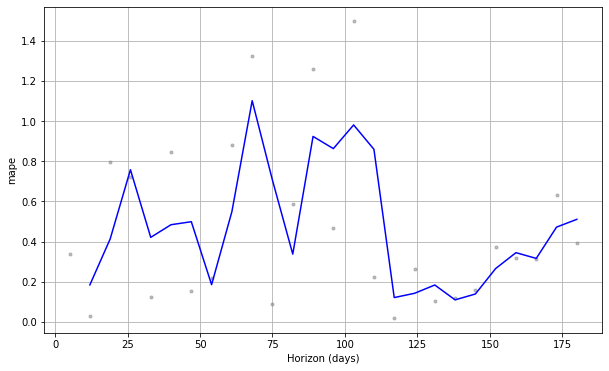

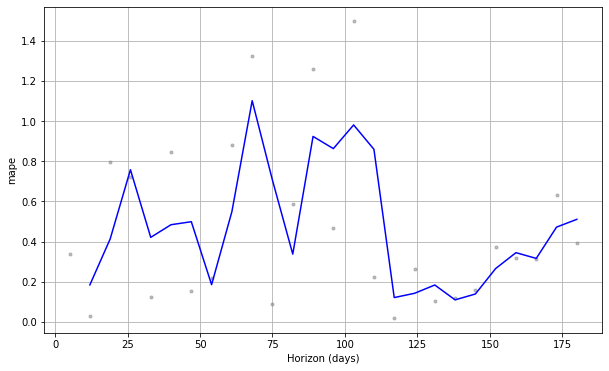

In [30]:
plot_cross_validation_metric(df_cv,metric='mape')